In [139]:
import pandas as pd

# Load data
profiles_data = pd.read_csv('profiles.csv')
risk_data = pd.read_csv('risk.csv')

# Show the columns 
print("Columns of profiles data:")
print(profiles_data.columns)

print("\nColumns of risk data:")
print(risk_data.columns)

# Show the first 10 rows of each DataFrame
print("\nFirst 10 rows of profiles data:")
profiles_data.head(10)

Columns of profiles data:
Index(['Unnamed: 0', 'ID', 'Sex', 'Age', 'Smoking', 'BMI',
       'Heart rate data used', 'MET (activity level)'],
      dtype='object')

Columns of risk data:
Index(['Unnamed: 0', 'ID', 'Diseases', 'risk'], dtype='object')

First 10 rows of profiles data:


,Unnamed: 0,ID,Sex,Age,Smoking,BMI,Heart rate data used,MET (activity level)
0,0,1,F,44.6671223513329,no,20.136249,1.0,16.812778
1,1,2,F,37.2221462747779,no,28.731747,1.0,11.625394
2,2,3,M,38.4634313055366,no,22.129740,1.0,32.309224
3,3,4,F,25.3315105946685,yes,22.939751,0.0,12.570449
4,4,5,F,37.1018455228982,former,28.507522,0.0,30.080823
5,5,6,F,56.1941216678059,former,40.123332,0.0,2.706019
6,6,7,F,37.0444292549556,former,26.054688,0.0,3.343662
7,7,8,F,26.9364319890636,no,19.473407,0.0,13.692114
8,8,9,F,35.8933697881066,no,22.313278,0.0,6.191875
9,9,10,F,33.8209159261791,former,34.190760,1.0,5.797528


In [141]:

print("\nFirst 10 rows of risk data:")
risk_data.head(10)


First 10 rows of risk data:


,Unnamed: 0,ID,Diseases,risk
0,0,1,Stroke,0.1362
1,5,6,Stroke,0.6855
2,10,11,Stroke,0.4033
3,11,12,Stroke,0.4148
4,22,23,Stroke,0.0929
5,23,24,Stroke,0.0428
6,24,25,Stroke,0.2278
7,28,29,Stroke,0.3648
8,29,30,Stroke,0.2061
9,35,36,Stroke,0.3754


In [143]:
cancer_data = risk_data[risk_data['Diseases'].str.contains('cancer', case=False)]

In [145]:
Cancer_Risk_Grouped = cancer_data.groupby(['ID'])['risk'].sum()

In [147]:
cancer_data

,Unnamed: 0,ID,Diseases,risk
340,469,4,Breast Cancer,0.8159
341,470,5,Breast Cancer,0.0851
342,472,7,Breast Cancer,0.2480
343,477,12,Breast Cancer,0.6985
344,490,25,Breast Cancer,0.0516
...,...,...,...,...
647,1152,221,Lung cancer,0.3493
648,1153,222,Lung cancer,0.1774
649,1155,224,Lung cancer,0.3556
650,1162,231,Lung cancer,0.3244


In [159]:
merged_data = pd.merge(profiles_data, Cancer_Risk_Grouped, on='ID', how='left')

In [161]:
merged_data.drop(merged_data.columns[0],axis=1,inplace=True)

In [47]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/c3/eb/496aa2f5d356af4185f770bc76055307f8d1870e11016b10fd779b21769c/xgboost-2.0.3-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 5.1 MB/s eta 0:00:00 0:00:010:00:01


In [163]:
merged_data.dropna(inplace=True)

In [165]:
merged_data.drop('ID',axis=1,inplace=True)

In [59]:
print(merged_data.dtypes)

Sex                      object
Age                      object
Smoking                  object
BMI                     float64
Heart rate data used    float64
MET (activity level)    float64
risk                    float64
dtype: object


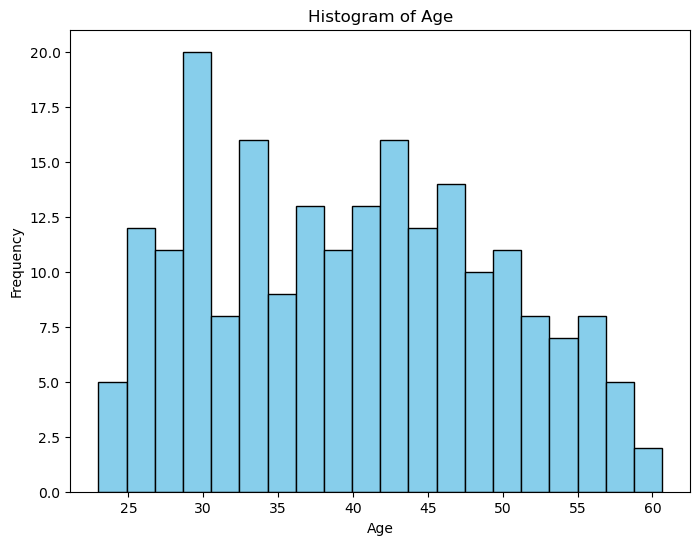

In [183]:
plt.figure(figsize=(8, 6))
plt.hist(merged_data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [185]:
# Remove any non-float values from the Age column
merged_data = merged_data[pd.to_numeric(merged_data['Age'], errors='coerce').notnull()]
merged_data['Age'] = merged_data['Age'].astype(float)
merged_data

,Sex,Age,Smoking,BMI,Heart rate data used,MET (activity level),risk
0,F,44.667122,no,20.136249,1.0,16.812778,0.1869
1,F,37.222146,no,28.731747,1.0,11.625394,0.4718
3,F,25.331511,yes,22.939751,0.0,12.570449,1.1196
4,F,37.101846,former,28.507522,0.0,30.080823,0.2582
5,F,56.194122,former,40.123332,0.0,2.706019,1.4796
...,...,...,...,...,...,...,...
228,F,25.547505,yes,22.476587,1.0,19.998903,0.9895
229,M,40.363636,no,23.370303,0.0,32.460310,0.0015
230,M,51.187970,former,27.131412,1.0,13.030024,0.7907
231,M,36.637047,yes,37.561728,1.0,3.688611,0.9963


In [187]:
print(merged_data.dtypes)

Sex                      object
Age                     float64
Smoking                  object
BMI                     float64
Heart rate data used    float64
MET (activity level)    float64
risk                    float64
dtype: object


In [189]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score

# Assuming merged_data is the DataFrame
# Assuming 'risk' is the outcome variable

# Identify categorical and numerical columns
categorical_columns = merged_data.select_dtypes(include=['object']).columns
numerical_columns = merged_data.select_dtypes(include=['int', 'float']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(merged_data[categorical_columns])

# Get the feature names after one-hot encoding
encoded_categorical_feature_names = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame from the encoded categorical data
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoded_categorical_feature_names)

# Apply MinMax scaling to numerical columns
scaler = MinMaxScaler()
scaled_numerical = scaler.fit_transform(merged_data[numerical_columns])

# Create a DataFrame from the scaled numerical data
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

# Concatenate the encoded categorical and scaled numerical DataFrames
processed_data = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)

# Split the processed data into features (X) and the outcome variable (y)
X = processed_data.drop('risk', axis=1)
y = processed_data['risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Decision Tree regressor
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the outcome variable for the test data
y_pred = model.predict(X_test)



/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [191]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_test and y_pred are the true outcome values and the predicted values, respectively
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('R-squared:', model.score(X_test, y_test))
print("RMSE:", rmse)

R-squared: 0.8847609038226406
RMSE: 0.05183558204805304


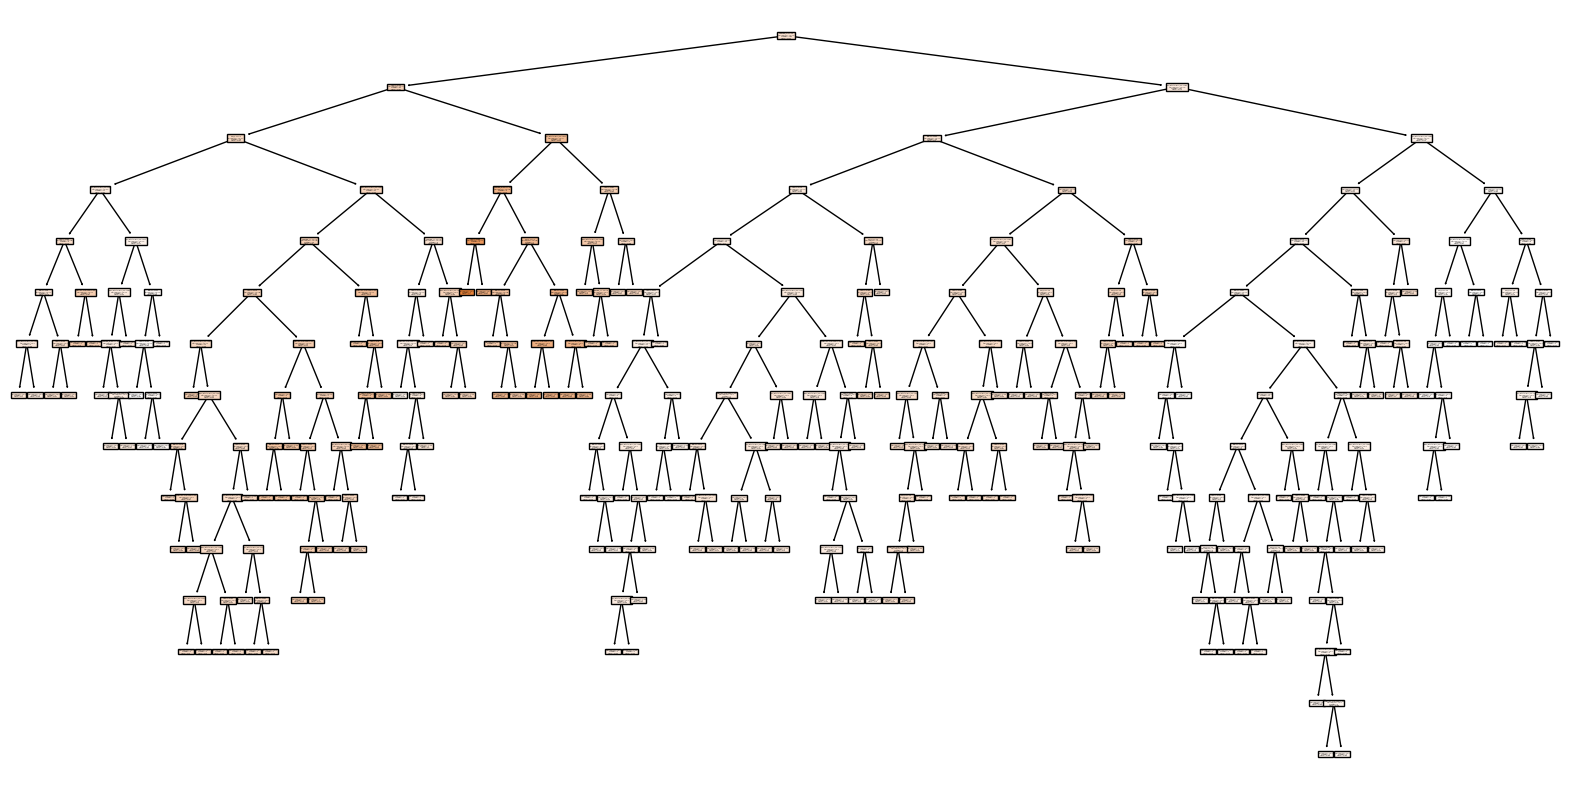

In [195]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert the Index object to a list
feature_names = list(X.columns)

# Assuming model is the trained Decision Tree regressor
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=feature_names)
plt.show()

In [201]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X and y are the features and target variable, and X_train, X_test, y_train, y_test are the training and testing sets
# Create an instance of the Decision Tree regressor with max_depth parameter
pruned_model = DecisionTreeRegressor(max_depth=4)

# Fit the pruned model to the training data
pruned_model.fit(X_train, y_train)

# Predict the outcome variable for the test data
y_pred_pruned = pruned_model.predict(X_test)

# Calculate the RMSE for the pruned model
print('R-squared:', pruned_model.score(X_test, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_pruned))
rmse_pruned = np.sqrt(mean_squared_error(y_test, y_pred_pruned))
print("RMSE (Pruned Model):", rmse_pruned)


R-squared: 0.693011256687657
Mean Squared Error: 0.0071577836367970465
RMSE (Pruned Model): 0.08460368571638618


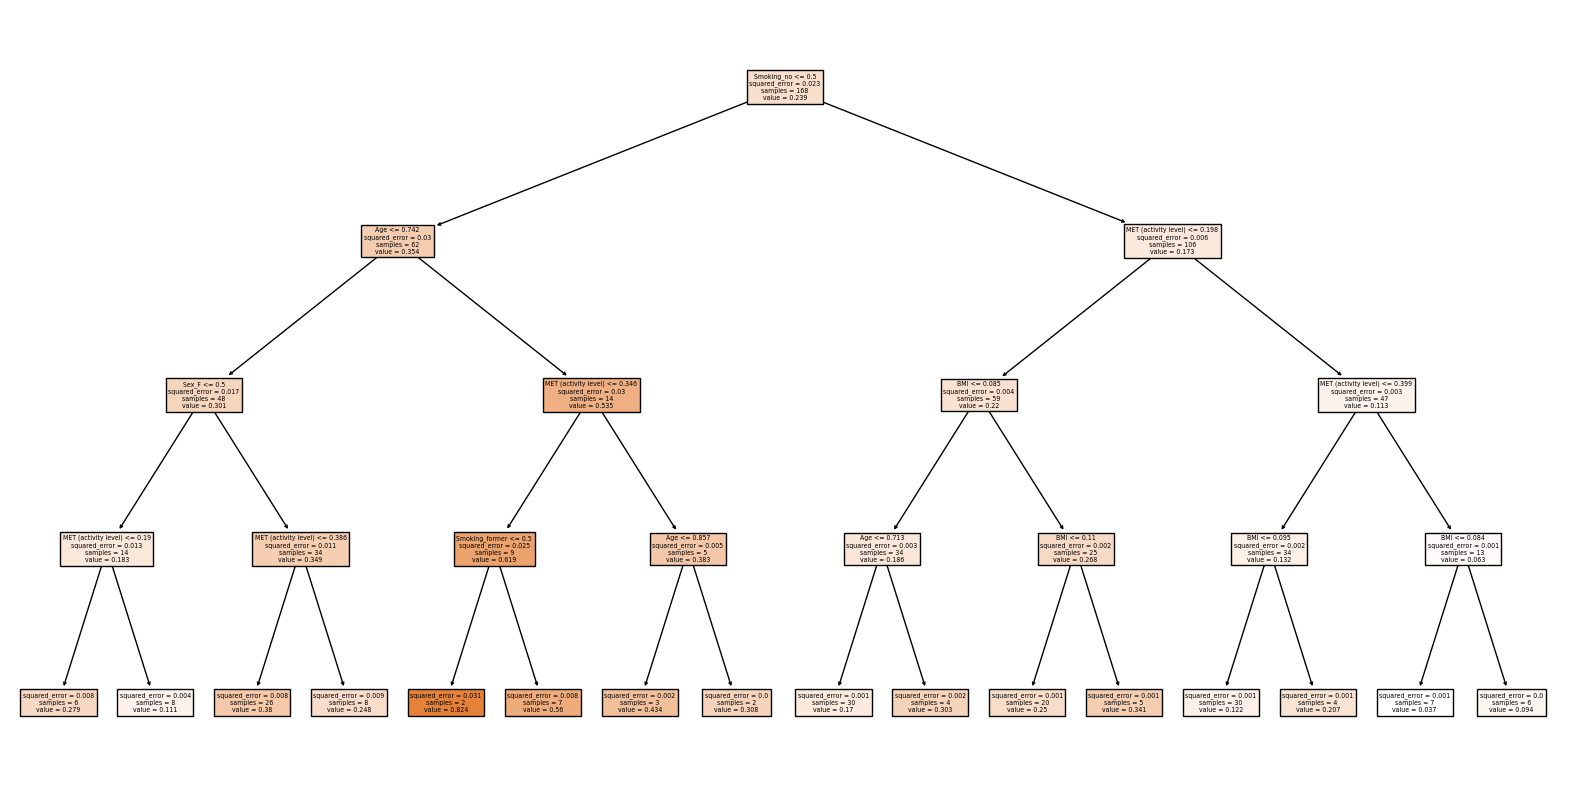

In [203]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert the Index object to a list
feature_names = list(X.columns)

# Assuming model is the trained Decision Tree regressor
plt.figure(figsize=(20, 10))
plot_tree(pruned_model, filled=True, feature_names=feature_names)
plt.show()

Sex                     0
Age                     0
Smoking                 0
BMI                     0
Heart rate data used    0
MET (activity level)    0
risk                    0
dtype: int64


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


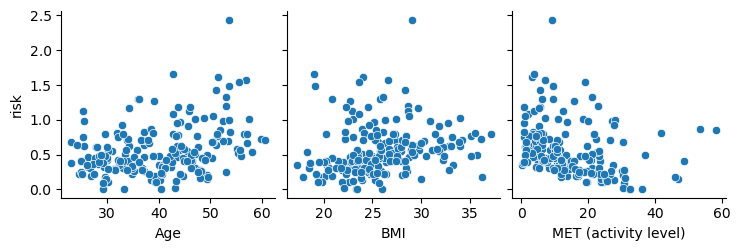

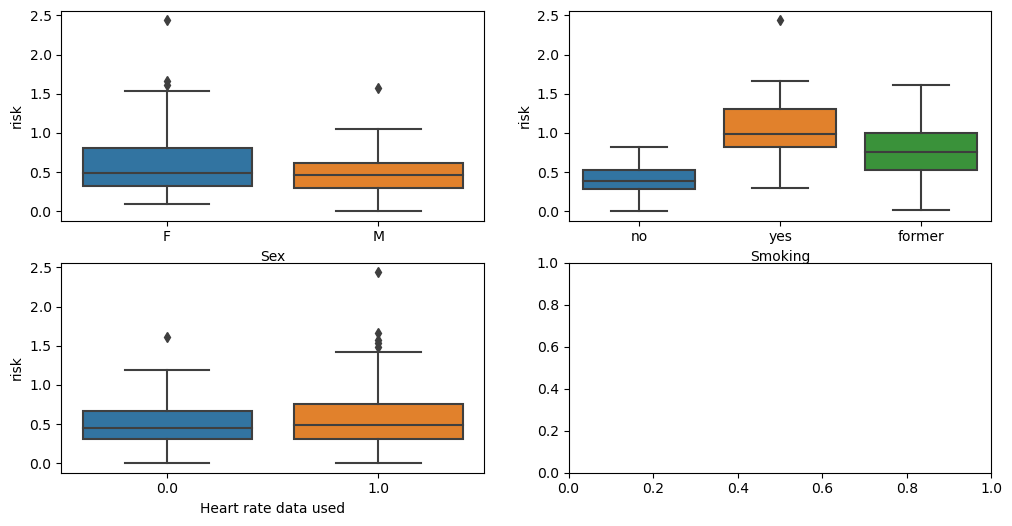

R-squared: 0.8847609038226406
Mean Squared Error: 0.0026869275662604387


In [207]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the merged data into a pandas DataFrame
#merged_data = pd.read_csv('merged_data.csv')

Q1 = merged_data['BMI'].quantile(0.25)
Q3 = merged_data['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Exclude outliers in the BMI data
filtered_data = merged_data[(merged_data['BMI'] >= lower_bound) & (merged_data['BMI'] <= upper_bound)]


# Check for missing values
print(filtered_data.isnull().sum())

# EDA
sns.pairplot(filtered_data, y_vars=['risk'], x_vars=['Age', 'BMI',  'MET (activity level)'])
plt.show()

# Box plots for categorical variables
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
sns.boxplot(x='Sex', y='risk', data=filtered_data, ax=axes[0,0])
sns.boxplot(x='Smoking', y='risk', data=filtered_data, ax=axes[0,1])
sns.boxplot(x='Heart rate data used',y='risk',data=filtered_data,ax=axes[1,0])
plt.show()

# Multivariate regression analysis
X = filtered_data[['Sex', 'Age', 'Smoking', 'BMI', 'Heart rate data used', 'MET (activity level)']]
y = filtered_data['risk']

print('R-squared:', model.score(X_test, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

In [221]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

categorical_columns = filtered_data.select_dtypes(include=['object']).columns
numerical_columns = filtered_data.select_dtypes(include=['int', 'float']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(merged_data[categorical_columns])

# Get the feature names after one-hot encoding
encoded_categorical_feature_names = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame from the encoded categorical data
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoded_categorical_feature_names)

# Apply MinMax scaling to numerical columns
scaler = MinMaxScaler()
scaled_numerical = scaler.fit_transform(merged_data[numerical_columns])

# Create a DataFrame from the scaled numerical data
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

# Concatenate the encoded categorical and scaled numerical DataFrames
processed_data = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)

# Split the processed data into features (X) and the outcome variable (y)
X = processed_data.drop('risk', axis=1)
y = processed_data['risk']


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Squared Error: 0.0033667272064701157
R-squared: 0.8847609038226406


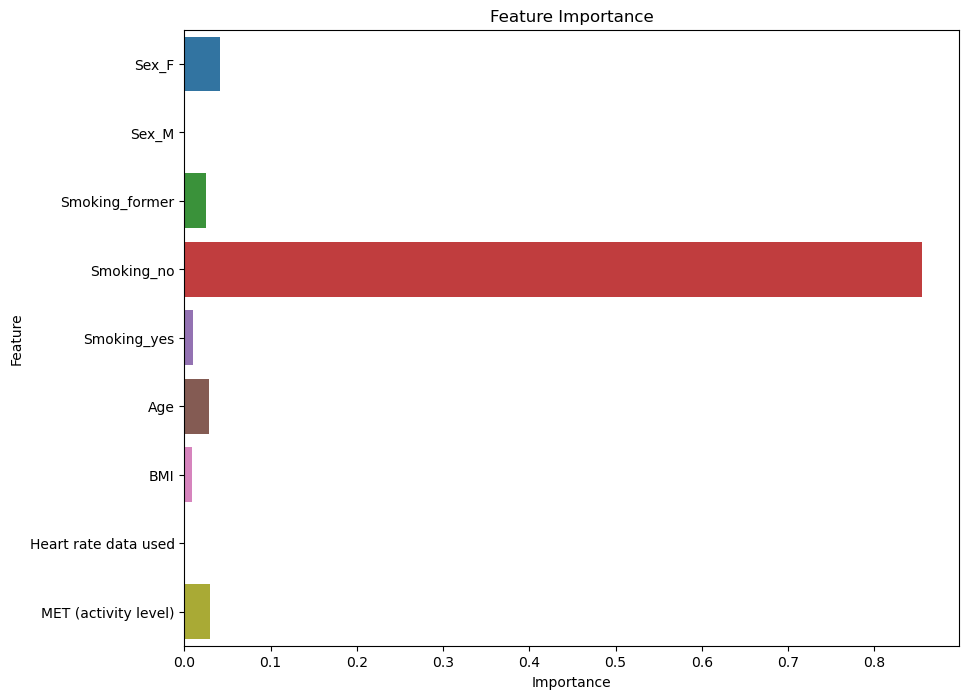

In [223]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost regressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

print('R-squared:', model.score(X_test, y_test))
# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=xgb.feature_importances_, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
